In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.callbacks import ModelCheckpoint, History
import numpy as np
import pylab as plt
import os

Using TensorFlow backend.


# MNIST example
src: https://blog.keras.io/building-autoencoders-in-keras.html


In [0]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

In [0]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 13s 217us/step - loss: 0.2110 - val_loss: 0.1629
Epoch 2/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.1548 - val_loss: 0.1462
Epoch 3/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.1412 - val_loss: 0.1368
Epoch 4/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1338 - val_loss: 0.1278
Epoch 5/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1284 - val_loss: 0.1273
Epoch 6/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1248 - val_loss: 0.1213
Epoch 7/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1218 - val_loss: 0.1200
Epoch 8/50
60000/60000 [==============================] - 6s 100us/step - loss: 0.1192 - val_loss: 0.1137
Epoch 9/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.1179 - val_loss: 0.1163
E

In [0]:
history.history.keys()

dict_keys(['val_loss', 'loss'])

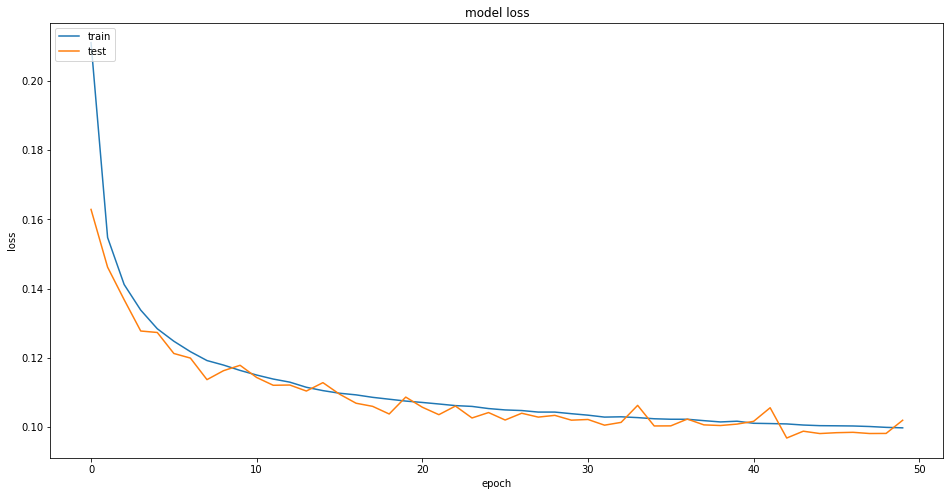

In [0]:
plt.figure(figsize=(16, 8))

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


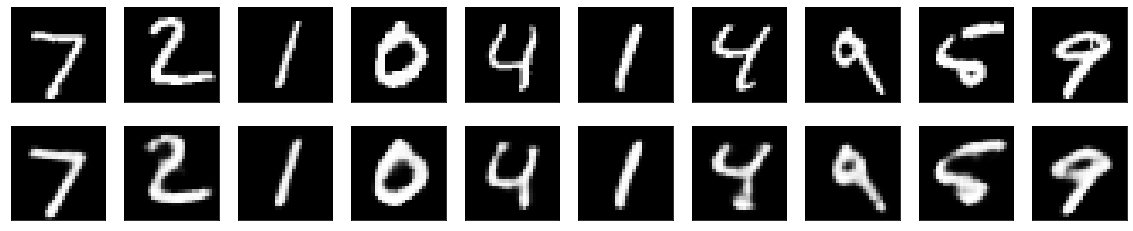

In [0]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# SLR

In [0]:
import pickle 

with open('/content/drive/My Drive/Course_work_SLR/lsa64_raw_dataset/hands_masked/first_16_for_autoencoder.pkl', 'rb') as file:
    (x_autoencoder, y_autoencoder) = pickle.load(file)

### If there is lack of RAM – run this cell.

In [0]:
# print('before:')
# print(x_autoencoder.shape)
# print(y_autoencoder.shape)
# # dumb way to reduce using RAM
# x_autoencoder = x_autoencoder[:x_autoencoder.shape[0] // 2]
# y_autoencoder = y_autoencoder[:y_autoencoder.shape[0] // 2]
# print('after:')
# print(x_autoencoder.shape)
# print(y_autoencoder.shape)

before:
(32384, 216, 384)
(32384, 216, 384)
after:
(16192, 216, 384)
(16192, 216, 384)


### Split data on train/test

In [0]:
from sklearn.model_selection import train_test_split

x_autoencoder_train, x_autoencoder_test, y_autoencoder_train, y_autoencoder_test = train_test_split(x_autoencoder, y_autoencoder, test_size=0.2, random_state=33)

# add chanels (here, grayscale)
x_autoencoder_train = x_autoencoder_train.reshape(*x_autoencoder_train.shape, 1)
x_autoencoder_test = x_autoencoder_test.reshape(*x_autoencoder_test.shape, 1)
y_autoencoder_train = y_autoencoder_train.reshape(*y_autoencoder_train.shape, 1)
y_autoencoder_test = y_autoencoder_test.reshape(*y_autoencoder_test.shape, 1)

# normalize data
x_autoencoder_train = x_autoencoder_train.astype('float32') / 255.
x_autoencoder_test = x_autoencoder_test.astype('float32') / 255.
y_autoencoder_train = y_autoencoder_train.astype('float32') / 255.
y_autoencoder_test = y_autoencoder_test.astype('float32') / 255.

print(x_autoencoder_train.shape)
print(x_autoencoder_test.shape)
print(y_autoencoder_train.shape)
print(y_autoencoder_test.shape)

(6608, 212, 380, 1)
(1652, 212, 380, 1)
(6608, 212, 380, 1)
(1652, 212, 380, 1)


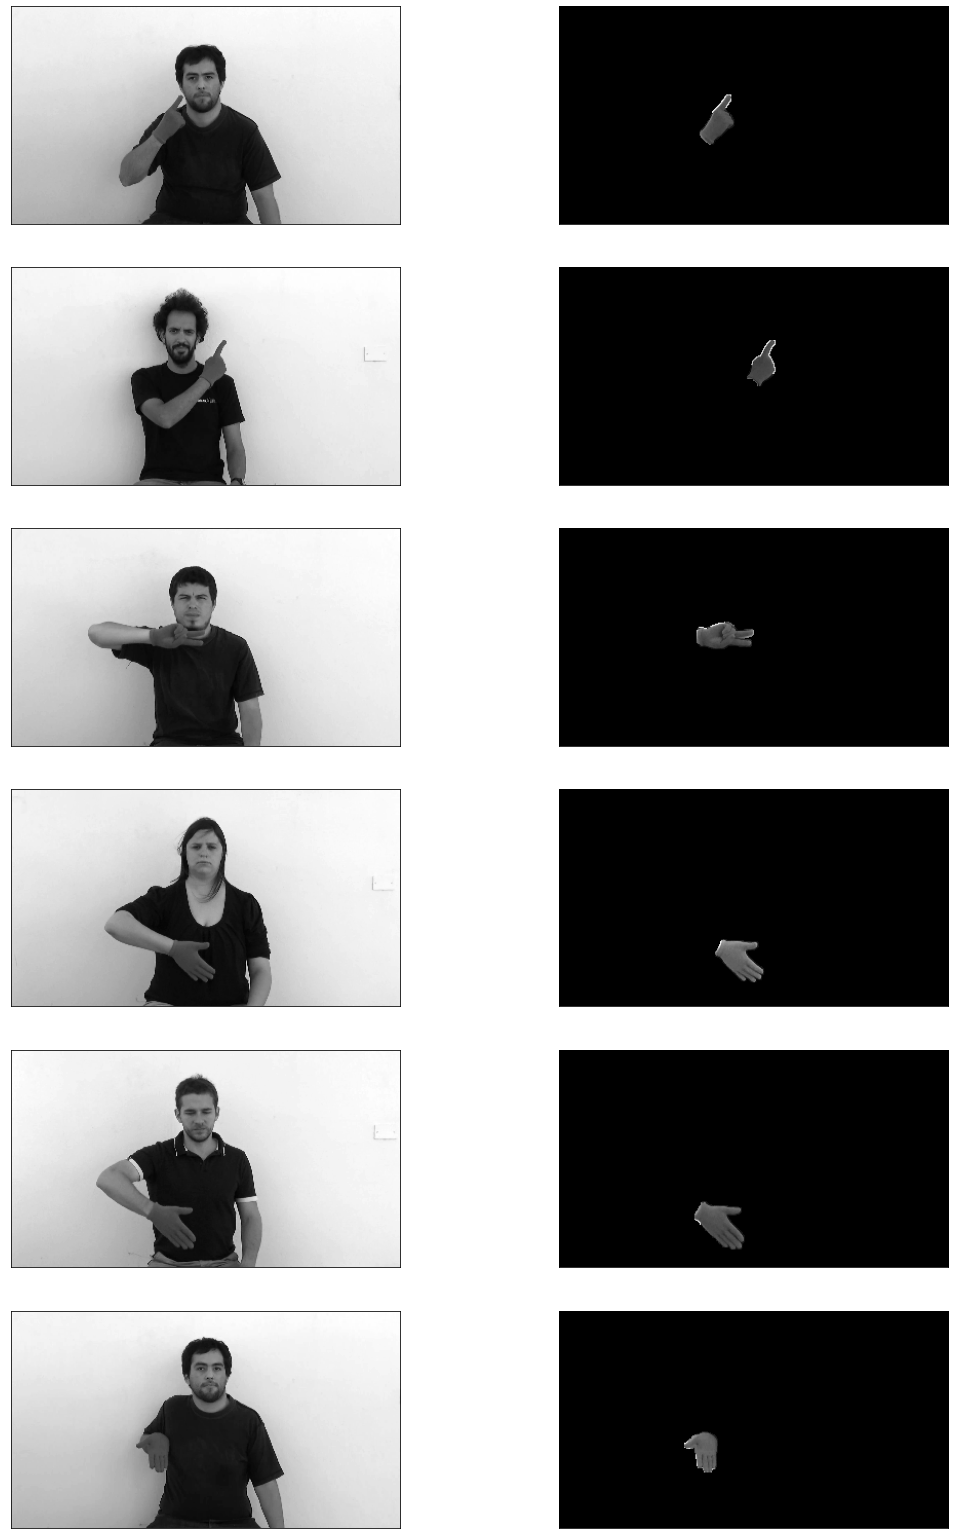

In [0]:
n = 6
plt.figure(figsize=(18, 28))
plt.gray()
for i in range(n):
    k = np.random.randint(0, x_autoencoder.shape[0])
    ax = plt.subplot(n, 2, 2*i + 1)
    plt.imshow(x_autoencoder[k])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(n, 2, 2*i + 2)
    plt.imshow(y_autoencoder[k])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Create new model

In [0]:
input_img = Input(shape=(212, 380, 1))

x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (27, 48, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [0]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 212, 380, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 212, 380, 64)      640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 106, 190, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 106, 190, 32)      18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 53, 95, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 53, 95, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 48, 32)        0   

In [0]:
save_dir = os.path.join('/content/drive/My Drive/Course_work_SLR/lsa64_raw_dataset/hands_masked', 'saved_models')
model_name = 'autoencoder_trained_model.h5'
checkpoint_path = os.path.join(save_dir, model_name)

checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True)
history = History()
callbacks_list = [checkpoint, history]

### Load/fit model

In [0]:
LOAD = True

if LOAD:
    autoencoder.load_weights(checkpoint_path)

In [0]:
autoencoder.fit(x_autoencoder_train, x_autoencoder_train,
                epochs=100,
                batch_size=64,
                shuffle=True,
                validation_data=(x_autoencoder_test, x_autoencoder_test),
                callbacks=callbacks_list)

Train on 6608 samples, validate on 1652 samples
Epoch 1/100
6608/6608 [==============================] - 60s 9ms/step - loss: 0.5872 - val_loss: 0.5859
Epoch 2/100
6608/6608 [==============================] - 46s 7ms/step - loss: 0.5865 - val_loss: 0.5852
Epoch 3/100
6608/6608 [==============================] - 45s 7ms/step - loss: 0.5862 - val_loss: 0.5850
Epoch 4/100
6608/6608 [==============================] - 46s 7ms/step - loss: 0.5860 - val_loss: 0.5842
Epoch 5/100
6608/6608 [==============================] - 45s 7ms/step - loss: 0.5859 - val_loss: 0.5857
Epoch 6/100
6608/6608 [==============================] - 45s 7ms/step - loss: 0.5857 - val_loss: 0.5848
Epoch 7/100
6608/6608 [==============================] - 45s 7ms/step - loss: 0.5856 - val_loss: 0.5843
Epoch 8/100
6608/6608 [==============================] - 45s 7ms/step - loss: 0.5855 - val_loss: 0.5844
Epoch 9/100
6608/6608 [==============================] - 45s 7ms/step - loss: 0.5854 - val_loss: 0.5851
Epoch 10/100
660

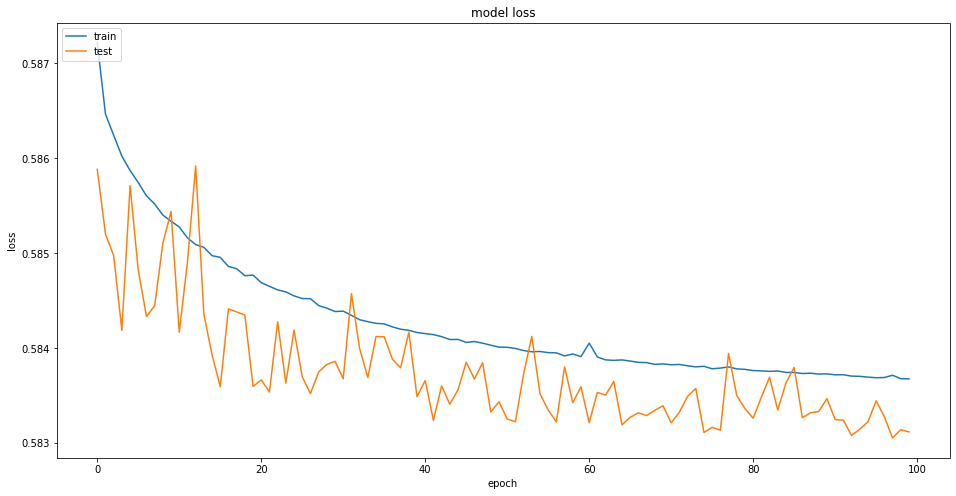

In [0]:
plt.figure(figsize=(16, 8))

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

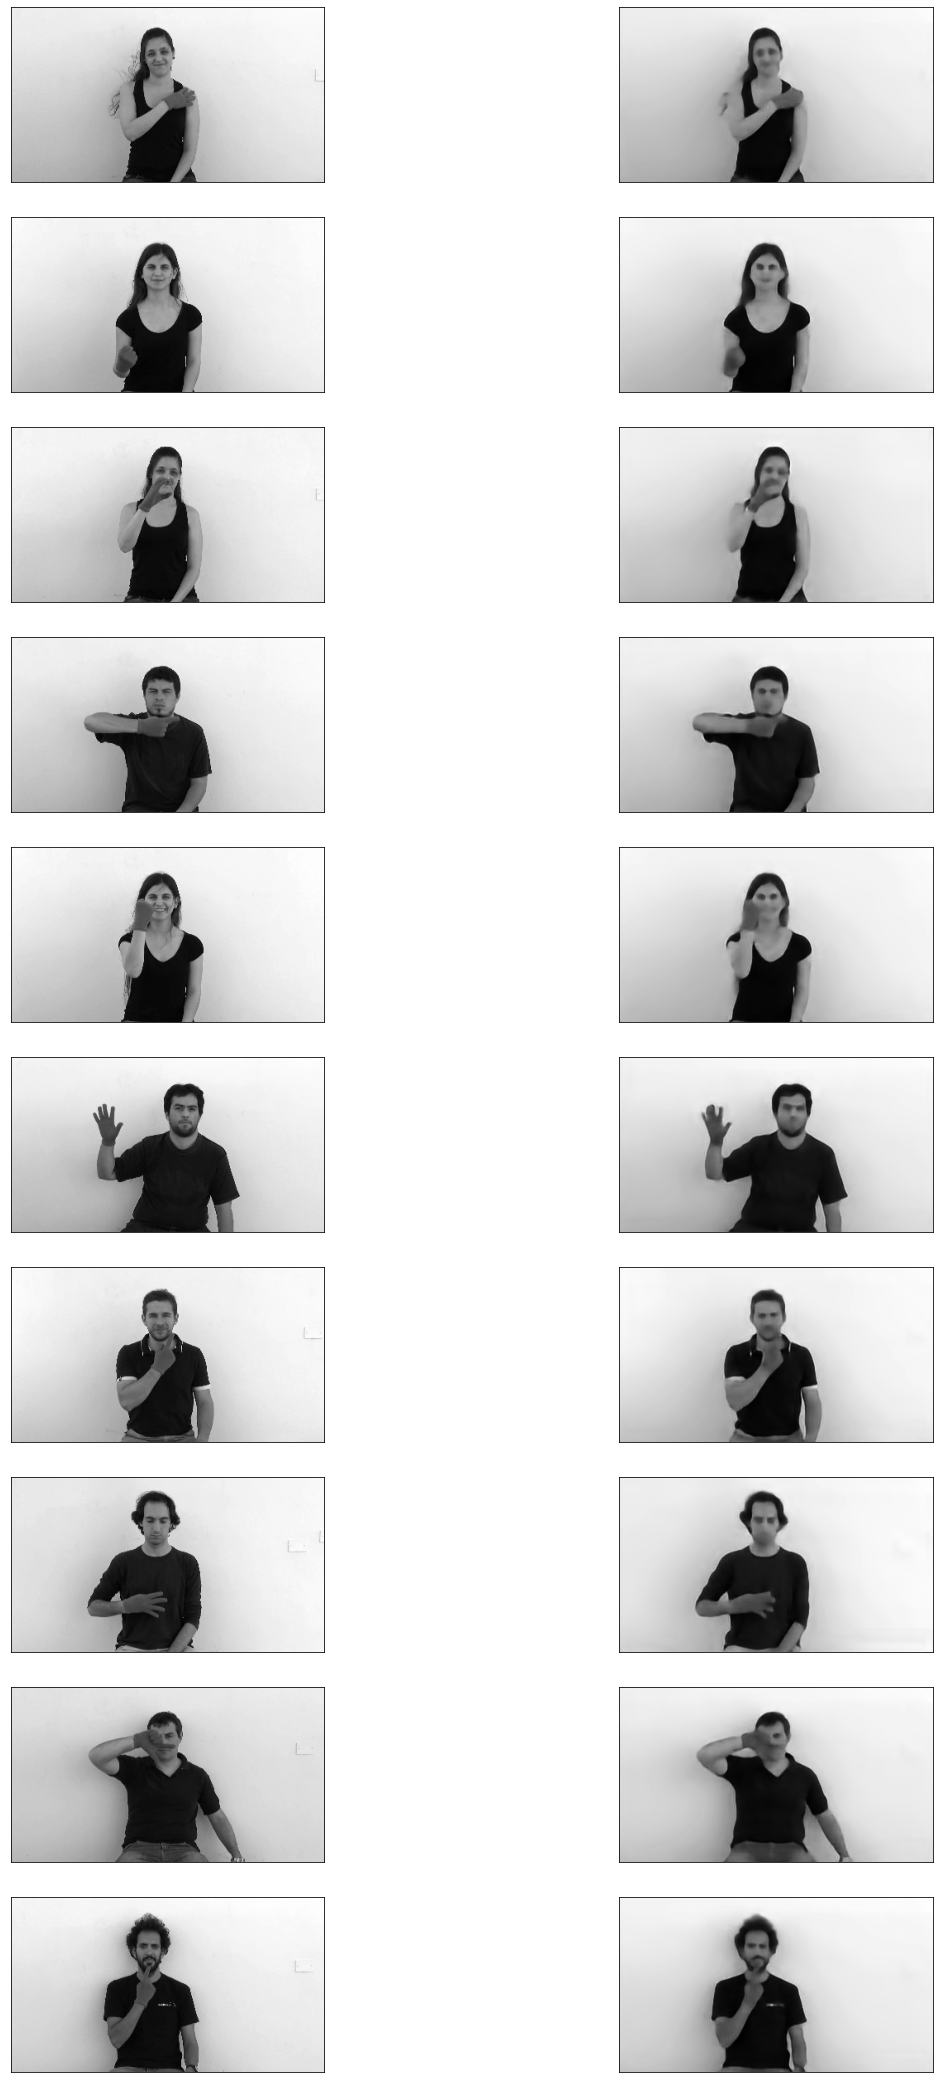

In [0]:
decoded_imgs = autoencoder.predict(x_autoencoder_test)

n = 10
plt.figure(figsize=(20, 38))
for i in range(n):
    # display original
    ax = plt.subplot(n, 2, 2*i + 1)
    plt.imshow(x_autoencoder_test[i].reshape(212, 380))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(n, 2, 2*i + 2)
    plt.imshow(decoded_imgs[i].reshape(212, 380))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()